In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import glob

# Fájl kiválasztása

patient = "Akos"
task = "futas"
loc = "also"
#patient = "Gabor"
#task = "bicepsz"
#loc = "also2"

files = glob.glob(patient + "/*.TXT")
for i in range(len(files)):
    print(files[i])

adat = pd.read_csv(patient + "/" + task + "_" + loc + ".TXT")
adat.head(1)

Akos\asztalsopres_also.TXT
Akos\asztalsopres_felso.TXT
Akos\box_also.TXT
Akos\box_felso.TXT
Akos\futas_also.TXT
Akos\futas_felso.TXT
Akos\gyors_lassu_nyomas_also.TXT
Akos\gyors_lassu_nyomas_felso.TXT
Akos\karemeles_also.TXT
Akos\karemeles_felso.TXT
Akos\lassu_karnyujtas_also.TXT
Akos\lassu_karnyujtas_felso.TXT
Akos\rugas_terdhajlitas_also.TXT
Akos\rugas_terdhajlitas_felso.TXT
Akos\seta_also.TXT
Akos\seta_felso.TXT
Akos\ugras_also.TXT
Akos\ugras_felso.TXT


,rtcDate,rtcTime,aX,aY,aZ,gX,gY,gZ,mX,mY,mZ,imu_degC,output_Hz,Unnamed: 13
0,01/01/2000,00:00:01.32,-215.82,884.28,-350.1,-0.91,-2.32,0.18,-10.8,-13.5,-62.7,31.24,333.333,NaN


In [2]:
# Adatok beolvasása

splt = []
time = []
index = 0

for index in range(0, adat["rtcTime"].size):
    splt.append(adat["rtcTime"][index].split(":"))
    time.append(float(splt[index][2]) + float(splt[index][1]) * 60 + float(splt[index][0]) * 3600)

print("Lefutott:", index)
adat['time'] = time

Lefutott: 57758


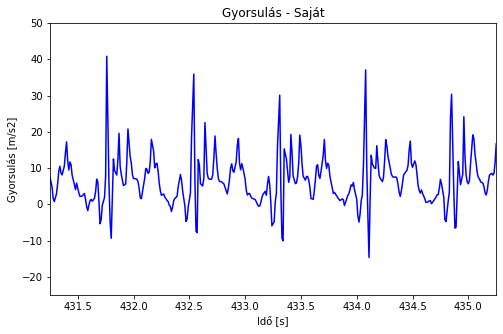

In [3]:
# Nyers adatok megjelenítése

lower = 0
upper = time[index]
lower = 431.25
upper = 435.25

        
y1 = np.array(adat['aX'])
y2 = np.array(adat['aY'])
y3 = np.array(adat['aZ'])
x = np.array(time)

plt.figure(figsize=(8,5))

plt.xlim(lower, upper)
plt.ylim(-25, 50)
#plt.autoscale(enable=True, axis='y', tight=None)
plt.title('Gyorsulás - Saját')
plt.xlabel('Idő [s]')
plt.ylabel('Gyorsulás [m/s2]')

plt.plot(x, y2 / 150, 'b')#,
         #x, y2 / 100, 'g',
         #x, y3 / 100, 'b')
plt.show()

f = open("korr_sajat.txt", "w")
for i in range(34520, 34800):
    tostr = str(y2[i]/150) + ","
    f.write(tostr)
f.close()

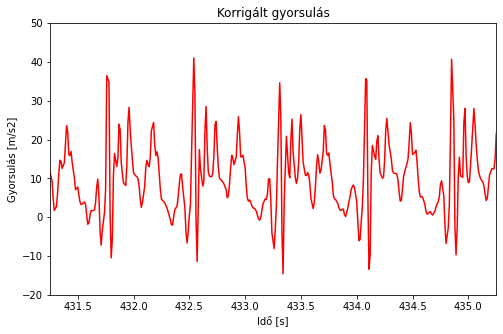

In [12]:
# Élsimítás

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

plt.figure(figsize=(8,5))
plt.title('Korrigált gyorsulás')
plt.xlabel('Idő [s]')
plt.ylabel('Gyorsulás [m/s2]')
plt.xlim(lower, upper)
plt.ylim(-20, 50)
#plt.autoscale(enable=True, axis='y', tight=None)
plt.plot(x, smooth(y2/100,2), 'r-')#, x, smooth(y2/100,8), 'g-', x, smooth(y3/100,8), 'b-')
plt.show()

In [13]:
print("Max: ", max(y3) / 100)
print("Min: ", min(y3) / 100)
print("Avg: ", y3.mean() / 100)

Max:  41.279300000000006
Min:  -44.7705
Avg:  3.5771652712131443


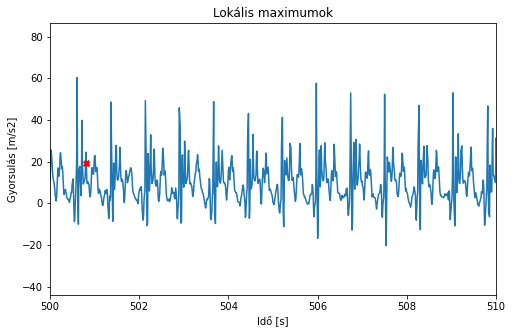

array([ 2471, 11750, 15415, 20298, 20476, 20871, 21004, 21269, 21600,
       21734, 21994, 22753, 22821, 23198, 23691, 24807, 26368, 26750,
       27041, 28046, 28179, 28290, 28423, 29560, 29693, 29988, 30167,
       30233, 30388, 30590, 30858, 31327, 31901, 32368, 32632, 32763,
       32829, 33117, 33250, 33362, 33914, 34116, 34359, 35496, 35920,
       36159, 36495, 38318, 39760, 41243, 41621, 42612, 42876, 43398,
       43530, 43816, 45792, 46524, 46718, 47251, 48439, 48837, 49097,
       49368, 49766, 51105, 51303, 51503, 51570, 51637, 52167, 52571,
       52768, 52834, 53716, 53826, 54551, 54684, 54816, 55276, 55870,
       56161, 56374, 56604, 56699], dtype=int64)

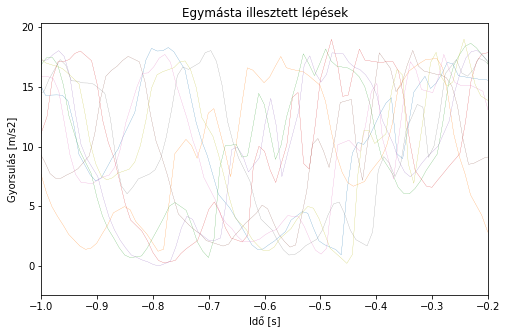

In [16]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(smooth(y2/100, 8), height = 19, distance=50)
plt.figure(figsize=(8,5))
plt.title('Lokális maximumok')
plt.xlabel('Idő [s]')
plt.ylabel('Gyorsulás [m/s2]')
plt.plot(x, y2/100);
#plt.plot(x, smooth(y2/100, 8))
plt.xlim(500, 510);
#plt.ylim(-20, 50)
plt.plot(peaks/(index/time[index])+0.1, smooth(y2/100, 8)[peaks], "rX")
plt.show()


plt.figure(figsize=(8,5))
plt.title('Egymásta illesztett lépések')
plt.xlabel('Idő [s]')
plt.ylabel('Gyorsulás [m/s2]')
plt.xlim(-1, -0.2);
for i in range(1, peaks.size):
    if (peaks[i] > 45000 and peaks[i] < 50000): #18k - 60k
        #print(peaks[i])
            plt.plot((x-peaks[i-1]/(index/time[index]))[peaks[i-1]:peaks[i]]-peaks[i]/42500,
                     smooth(y2[peaks[i-1]:peaks[i]]/100, 8),linewidth=0.2)
peaks

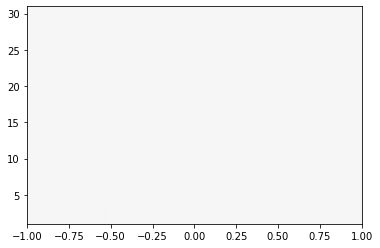

In [17]:
from scipy import signal
import matplotlib.pyplot as plt
t = time
sig  = y2
widths = np.arange(1, 20)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()